# Analytic optimization example

In this example, we consider a simple optimization problem to illustrate GEMSEO interface and MMA optimization library integration.


## Imports

In [1]:
from gemseo.algos.design_space import DesignSpace
from gemseo.algos.opt_result import OptimizationResult
from gemseo.api import create_discipline
from gemseo.api import create_scenario
from gemseo.api import configure_logger
from gemseo.api import execute_post
from numpy import array
from numpy import ones
configure_logger()

<RootLogger root (INFO)>

## Define objective function, constraints and its gradients.

The objective function:

In [2]:
def obj_func(x=0.0, y=0.0):
    """The objective function."""
    f = (x - 1.0) ** 2 + (y - 1.0) ** 2
    return f


def d_obj_func(x=0.0, y=0.0):
    """The objective function jacobian."""
    jac = array([2.0 * (x[0] - 1.0), 2 * (y[0] - 1.0)])
    return jac

The constraint function:

In [3]:
def cstr_func(x=0.0, y=0.0):
    """The inequality constraint function."""
    g = x + y - 1.0
    return g


def d_cstr_func(x=0.0, y=0.0):
    """The inequality constraint function jacobian."""
    jac = ones((1, 2))
    return jac

The GEMSEO autopy disciplines:

In [4]:
disc1 = create_discipline(
            "AutoPyDiscipline", py_func=obj_func, py_jac=d_obj_func
        )
disc2 = create_discipline("AutoPyDiscipline", py_func=cstr_func, py_jac=d_cstr_func)

## Define the design space

In [5]:
ds = DesignSpace()
ds.add_variable("x", l_b=0.0, u_b=1.0, value=0.1)
ds.add_variable("y", l_b=0.0, u_b=1.0, value=0.1)

## Define the scenario

In [6]:
scenario = create_scenario(
        disciplines=[disc1, disc2],
        formulation="DisciplinaryOpt",
        objective_name="f",
        design_space=ds
    )
scenario.add_constraint("g", "ineq")

## Define the scenario execution options.

In [7]:
ineq_tol = 1e-5
convergence_tol = 1e-8
options = {"algo":"MMA",
            "max_iter": 50,
            "algo_options": {
                "tol": 1e-5, 
                "normalize_design_space": True,
                "ineq_tolerance": ineq_tol,
                "xtol_rel": convergence_tol,
                "xtol_abs": convergence_tol,
                "ftol_rel": convergence_tol,
                "ftol_abs": convergence_tol,
                "ctol_abs": convergence_tol,
            },
        }

## Execute the optimization algorithm.

In [8]:
scenario.execute(options)
opt = scenario.formulation.opt_problem.solution.x_opt

    INFO - 08:24:16:  
    INFO - 08:24:16: *** Start MDOScenario execution ***
    INFO - 08:24:16: MDOScenario
    INFO - 08:24:16:    Disciplines: cstr_func obj_func
    INFO - 08:24:16:    MDO formulation: DisciplinaryOpt
    INFO - 08:24:16: Optimization problem:
    INFO - 08:24:16:    minimize f(x, y)
    INFO - 08:24:16:    with respect to x, y
    INFO - 08:24:16:    subject to constraints:
    INFO - 08:24:16:       g(x, y) <= 0.0
    INFO - 08:24:16:    over the design space:
    INFO - 08:24:16:    +------+-------------+-------+-------------+-------+
    INFO - 08:24:16:    | name | lower_bound | value | upper_bound | type  |
    INFO - 08:24:16:    +------+-------------+-------+-------------+-------+
    INFO - 08:24:16:    | x    |      0      |  0.1  |      1      | float |
    INFO - 08:24:16:    | y    |      0      |  0.1  |      1      | float |
    INFO - 08:24:16:    +------+-------------+-------+-------------+-------+
    INFO - 08:24:16: Solving optimization prob

In [9]:

print("Optimum = ", opt)

Optimum =  [0.49999995 0.49999995]


## Post-process the results

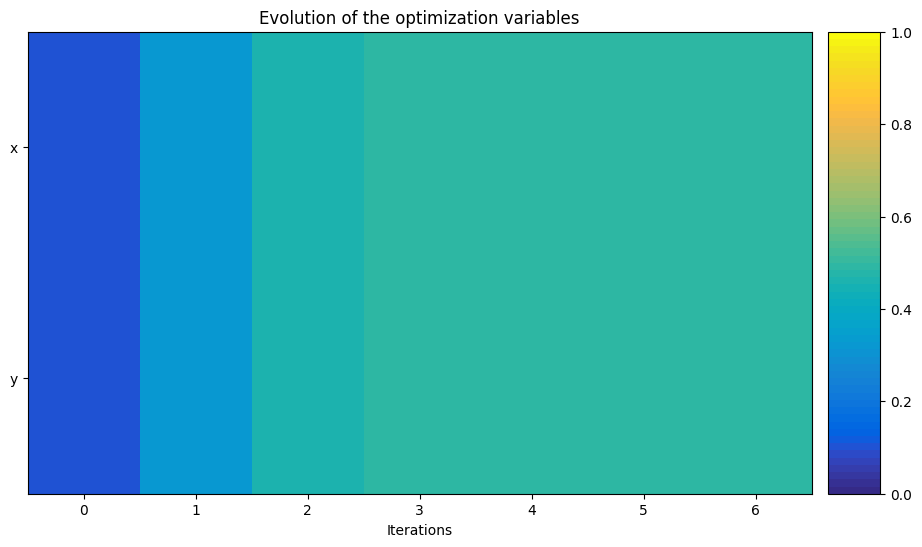

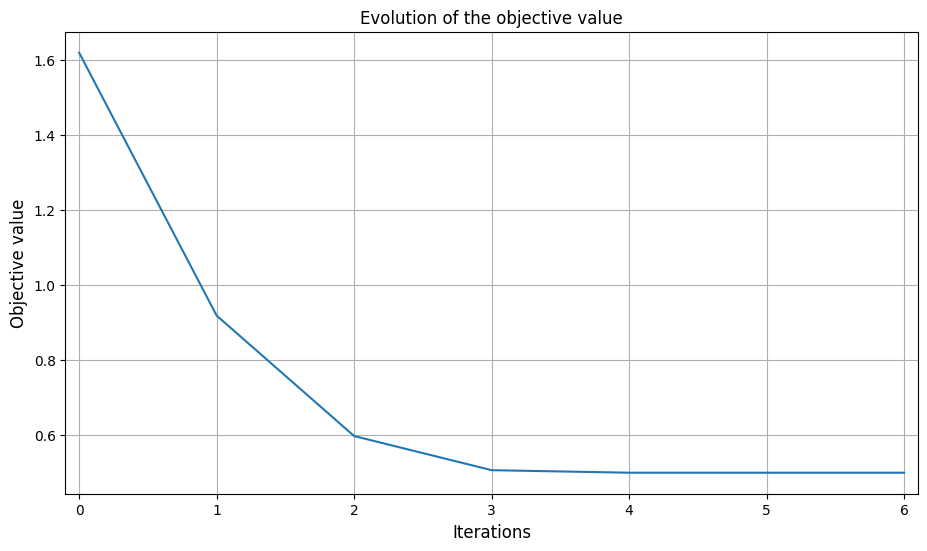

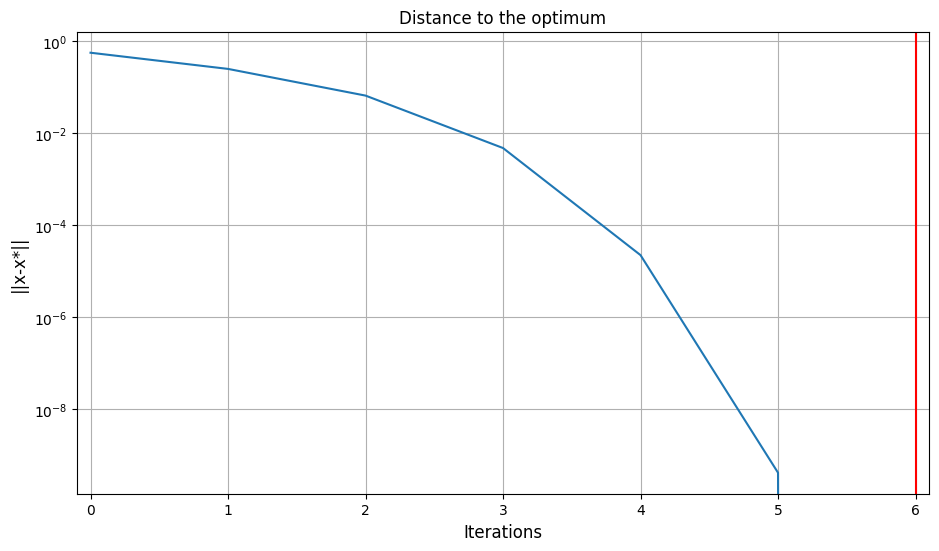

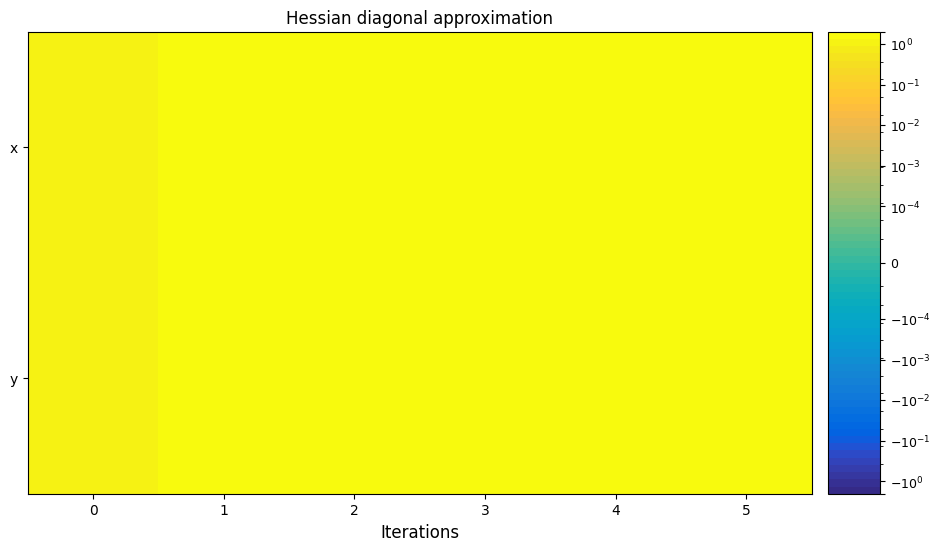

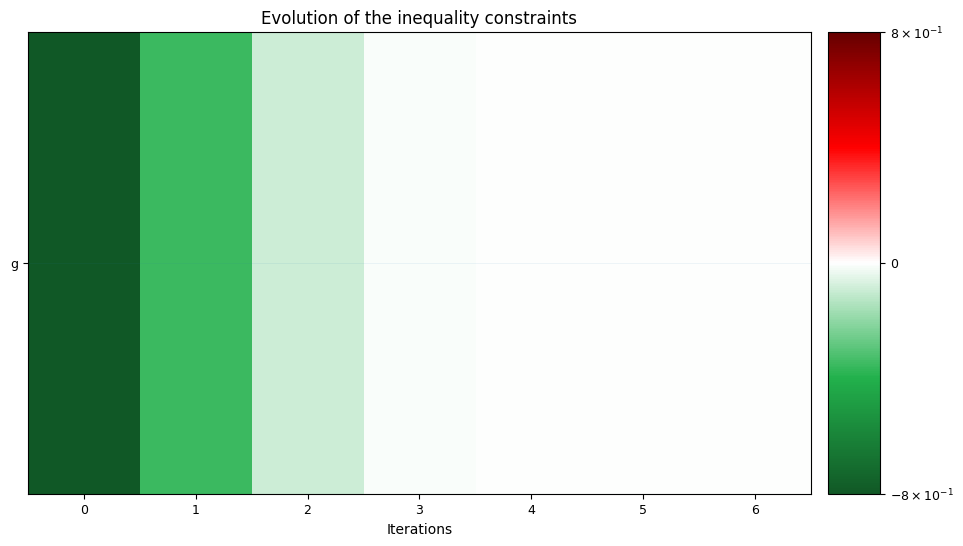

In [10]:
execute_post(scenario, "OptHistoryView", show=True, save=False)
